In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler    

import torchvision
from torchvision import datasets,transforms 

In [2]:
import zipfile
with zipfile.ZipFile("face_data.zip","r") as zip_ref:
    zip_ref.extractall("./")
with zipfile.ZipFile("face_test.zip","r") as zip_ref:
    zip_ref.extractall("./")

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]

In [4]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean,
                         std=std)
])

In [5]:
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean,
                         std=std)
])

In [6]:
train_dir = 'face_data/train/'
test_dir = 'face_data/val/'

In [8]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=train_transform)

In [9]:
train_data

Dataset ImageFolder
    Number of datapoints: 121
    Root location: face_data/train/
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [10]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=4,
                                           shuffle=True, num_workers=4)

In [11]:
test_data = datasets.ImageFolder(root=test_dir,
                                transform=test_transform)

In [12]:
test_data

Dataset ImageFolder
    Number of datapoints: 30
    Root location: face_data/val/
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [13]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=8,
                                          shuffle=True, num_workers=4)

In [14]:
dataloaders = {
    'train': train_loader,
    'test': test_loader
}

In [15]:
class_names = train_data.classes

print(class_names)
print(len(class_names))

['ben_afflek', 'brad_pitt', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling']
6


In [16]:
def imshow(inp, title):

    inp = inp.cpu().numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    
    plt.figure (figsize = (12, 6))

    plt.imshow(inp)
    plt.title(title)
    plt.pause(2)

In [17]:
inputs, classes = next(iter(dataloaders['train']))

In [18]:
out = torchvision.utils.make_grid(inputs)

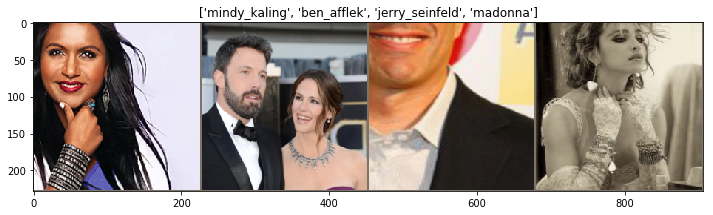

In [19]:
imshow(out, title=[class_names[x] for x in classes])

In [20]:
from torchvision import models

model = models.alexnet(pretrained=True)

In [21]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [22]:
num_ftrs = model.classifier[6].in_features
num_ftrs

4096

In [23]:
model.classifier[6] = nn.Linear(num_ftrs, len(class_names))

In [24]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [25]:
criterion   = nn.CrossEntropyLoss()

optimizer   = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [26]:
import time
import copy
import os

dataset_sizes = {
    'train': len(train_data),
    'test': len(test_data)
}

In [27]:
def train_model(model, criterion, optimizer, num_epochs=500):
    since = time.time()
    FT_losses = []
    model = model.to(device)

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch + 1, num_epochs))
        print('-' * 10)
    # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                FT_losses.append(loss.item())
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double()/dataset_sizes[phase]
            print('{} Loss: {:.4f} Acc: {:.2f}%'.format(
                phase, epoch_loss, epoch_acc*100))
            # deep copy the model
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, FT_losses

In [28]:
model, FT_losses = train_model(model, criterion, optimizer, num_epochs=500)

Epoch 0/499
----------
train Loss: 7.3054 Acc: 1.2903
test Loss: 12.3090 Acc: 2.7500
Epoch 1/499
----------
train Loss: 5.4760 Acc: 1.7742
test Loss: 8.8800 Acc: 3.7500
Epoch 2/499
----------
train Loss: 4.5861 Acc: 2.3226
test Loss: 8.1034 Acc: 4.7500
Epoch 3/499
----------
train Loss: 4.2823 Acc: 2.4516
test Loss: 8.2113 Acc: 4.2500
Epoch 4/499
----------
train Loss: 3.3471 Acc: 2.5484
test Loss: 5.5711 Acc: 6.7500
Epoch 5/499
----------
train Loss: 3.6510 Acc: 2.5806
test Loss: 9.2428 Acc: 4.2500
Epoch 6/499
----------
train Loss: 3.2940 Acc: 2.6774
test Loss: 6.6952 Acc: 4.7500
Epoch 7/499
----------
train Loss: 4.0899 Acc: 2.5161
test Loss: 6.4076 Acc: 4.5000
Epoch 8/499
----------
train Loss: 3.5966 Acc: 2.5161
test Loss: 4.9951 Acc: 5.5000
Epoch 9/499
----------
train Loss: 3.3370 Acc: 2.5806
test Loss: 8.5372 Acc: 4.5000
Epoch 10/499
----------
train Loss: 2.5969 Acc: 2.9032
test Loss: 5.7022 Acc: 5.2500
Epoch 11/499
----------
train Loss: 3.5894 Acc: 2.6129
test Loss: 7.8990 A

test Loss: 12.8222 Acc: 5.5000
Epoch 97/499
----------
train Loss: 1.0327 Acc: 3.5484
test Loss: 6.3495 Acc: 5.5000
Epoch 98/499
----------
train Loss: 0.6427 Acc: 3.7419
test Loss: 10.1249 Acc: 5.2500
Epoch 99/499
----------
train Loss: 0.6469 Acc: 3.6774
test Loss: 8.0897 Acc: 6.0000
Epoch 100/499
----------
train Loss: 0.6203 Acc: 3.6774
test Loss: 10.1742 Acc: 5.2500
Epoch 101/499
----------
train Loss: 1.4617 Acc: 3.5484
test Loss: 8.1656 Acc: 5.5000
Epoch 102/499
----------
train Loss: 0.5971 Acc: 3.6452
test Loss: 8.5901 Acc: 5.7500
Epoch 103/499
----------
train Loss: 1.3519 Acc: 3.4194
test Loss: 9.2132 Acc: 6.0000
Epoch 104/499
----------
train Loss: 1.2866 Acc: 3.4839
test Loss: 6.7006 Acc: 5.7500
Epoch 105/499
----------
train Loss: 0.6140 Acc: 3.7097
test Loss: 5.7416 Acc: 6.0000
Epoch 106/499
----------
train Loss: 0.6946 Acc: 3.6452
test Loss: 13.3609 Acc: 5.0000
Epoch 107/499
----------
train Loss: 0.6246 Acc: 3.7419
test Loss: 5.6551 Acc: 5.5000
Epoch 108/499
---------

train Loss: 0.2133 Acc: 3.8387
test Loss: 7.5661 Acc: 6.0000
Epoch 193/499
----------
train Loss: 0.2485 Acc: 3.8065
test Loss: 6.9559 Acc: 6.0000
Epoch 194/499
----------
train Loss: 0.8490 Acc: 3.7419
test Loss: 7.4971 Acc: 6.0000
Epoch 195/499
----------
train Loss: 0.5830 Acc: 3.7419
test Loss: 6.5846 Acc: 5.7500
Epoch 196/499
----------
train Loss: 0.4469 Acc: 3.7742
test Loss: 5.2653 Acc: 5.7500
Epoch 197/499
----------
train Loss: 0.9154 Acc: 3.5806
test Loss: 7.3608 Acc: 6.2500
Epoch 198/499
----------
train Loss: 0.2787 Acc: 3.8065
test Loss: 5.2899 Acc: 6.2500
Epoch 199/499
----------
train Loss: 0.3796 Acc: 3.7419
test Loss: 5.5286 Acc: 6.5000
Epoch 200/499
----------
train Loss: 0.7882 Acc: 3.6452
test Loss: 3.7692 Acc: 6.5000
Epoch 201/499
----------
train Loss: 0.2271 Acc: 3.8065
test Loss: 5.7739 Acc: 6.2500
Epoch 202/499
----------
train Loss: 0.6887 Acc: 3.5806
test Loss: 3.8509 Acc: 7.0000
Epoch 203/499
----------
train Loss: 0.2067 Acc: 3.8387
test Loss: 4.2681 Acc: 

test Loss: 5.2255 Acc: 6.0000
Epoch 288/499
----------
train Loss: 0.4700 Acc: 3.7097
test Loss: 4.5118 Acc: 5.7500
Epoch 289/499
----------
train Loss: 0.4737 Acc: 3.7097
test Loss: 6.9295 Acc: 5.5000
Epoch 290/499
----------
train Loss: 0.9400 Acc: 3.5806
test Loss: 7.0470 Acc: 5.7500
Epoch 291/499
----------
train Loss: 0.4831 Acc: 3.7419
test Loss: 6.0223 Acc: 6.0000
Epoch 292/499
----------
train Loss: 0.4177 Acc: 3.7419
test Loss: 6.2513 Acc: 6.2500
Epoch 293/499
----------
train Loss: 0.3798 Acc: 3.7419
test Loss: 7.1936 Acc: 5.7500
Epoch 294/499
----------
train Loss: 0.4289 Acc: 3.7097
test Loss: 7.0292 Acc: 6.2500
Epoch 295/499
----------
train Loss: 0.3121 Acc: 3.8065
test Loss: 4.4561 Acc: 6.2500
Epoch 296/499
----------
train Loss: 0.0885 Acc: 3.8710
test Loss: 5.0584 Acc: 6.0000
Epoch 297/499
----------
train Loss: 0.6182 Acc: 3.7419
test Loss: 5.5637 Acc: 5.7500
Epoch 298/499
----------
train Loss: 0.4624 Acc: 3.7742
test Loss: 7.8936 Acc: 6.0000
Epoch 299/499
----------

train Loss: 0.3333 Acc: 3.7419
test Loss: 5.9856 Acc: 6.0000
Epoch 384/499
----------
train Loss: 0.2698 Acc: 3.8710
test Loss: 6.7237 Acc: 5.7500
Epoch 385/499
----------
train Loss: 0.6018 Acc: 3.7742
test Loss: 7.0347 Acc: 6.2500
Epoch 386/499
----------
train Loss: 0.3929 Acc: 3.7419
test Loss: 6.5973 Acc: 6.0000
Epoch 387/499
----------
train Loss: 0.2909 Acc: 3.8065
test Loss: 6.8213 Acc: 5.7500
Epoch 388/499
----------
train Loss: 0.1846 Acc: 3.8387
test Loss: 5.9931 Acc: 6.0000
Epoch 389/499
----------
train Loss: 0.2107 Acc: 3.8065
test Loss: 6.3896 Acc: 6.2500
Epoch 390/499
----------
train Loss: 0.0941 Acc: 3.8387
test Loss: 6.5915 Acc: 6.2500
Epoch 391/499
----------
train Loss: 0.2057 Acc: 3.8065
test Loss: 7.7023 Acc: 6.0000
Epoch 392/499
----------
train Loss: 0.3576 Acc: 3.8710
test Loss: 8.4926 Acc: 6.0000
Epoch 393/499
----------
train Loss: 0.1952 Acc: 3.8387
test Loss: 6.4552 Acc: 6.2500
Epoch 394/499
----------
train Loss: 0.3444 Acc: 3.7097
test Loss: 6.6605 Acc: 

test Loss: 9.9572 Acc: 5.7500
Epoch 479/499
----------
train Loss: 0.2855 Acc: 3.7419
test Loss: 8.3892 Acc: 6.0000
Epoch 480/499
----------
train Loss: 0.4527 Acc: 3.6452
test Loss: 9.8317 Acc: 5.7500
Epoch 481/499
----------
train Loss: 0.2861 Acc: 3.7742
test Loss: 5.0504 Acc: 6.2500
Epoch 482/499
----------
train Loss: 0.3338 Acc: 3.8065
test Loss: 5.8972 Acc: 6.2500
Epoch 483/499
----------
train Loss: 0.4939 Acc: 3.7097
test Loss: 4.5589 Acc: 6.2500
Epoch 484/499
----------
train Loss: 0.2616 Acc: 3.8387
test Loss: 4.9204 Acc: 6.5000
Epoch 485/499
----------
train Loss: 0.1740 Acc: 3.8387
test Loss: 5.6636 Acc: 6.2500
Epoch 486/499
----------
train Loss: 0.2671 Acc: 3.8065
test Loss: 7.2996 Acc: 6.2500
Epoch 487/499
----------
train Loss: 0.3715 Acc: 3.7419
test Loss: 8.8199 Acc: 5.7500
Epoch 488/499
----------
train Loss: 0.1553 Acc: 3.8387
test Loss: 6.9863 Acc: 6.0000
Epoch 489/499
----------
train Loss: 0.3391 Acc: 3.8065
test Loss: 7.3412 Acc: 6.0000
Epoch 490/499
----------

In [29]:
with torch.no_grad():
    
    correct = 0
    total = 0

    test_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean,
                             std=std)
    ])
    base_path = "face_data/val/"

    test_data = datasets.ImageFolder(root=base_path,
                                transform=test_transform)

    test_loader = torch.utils.data.DataLoader(test_data, batch_size=8,
                                          shuffle=True, num_workers=4)

    for images, labels in test_loader:
        
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
#         print(predicted)
    print('Accuracy of the model on the test images: {}%'\
          .format(100 * correct / total))

Accuracy of the model on the test images: 93.33333333333333%


### For running the predictions without knowing the labels for a bunch of images in a folder

['jerry-seinfeld-kesha.jpg', 'phyynviqok1.jpg', '5d31fa2336e03c040d3e2ee4.jpg', '501720434.jpg', 'c7108defde5c3f593ee0152fe904d1c3--brad-pitt-movies-beautiful-men.jpg', 'mindy-kaling-the-office.jpg', 'rs_600x600-200328163728-600.ben-affleck-ana-de-armas-2.ct.032820.jpg', 'unnamed.jpg', 'elton-john-dog-dies-t.jpg', '5760616191058425008c8f56.jpg', '2019_06_30_75478_1561866556._large.jpg', 'mindy-kaling.jpg', 'wayback4.0.jpeg']


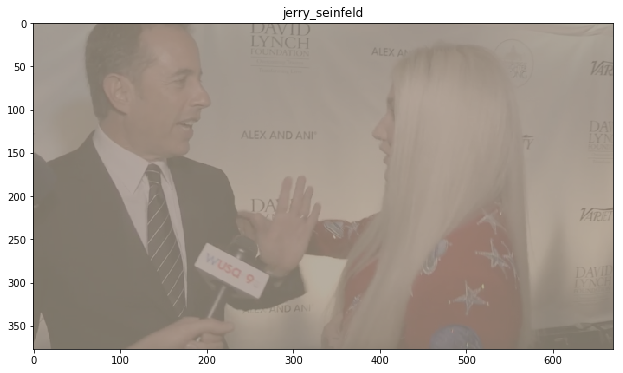

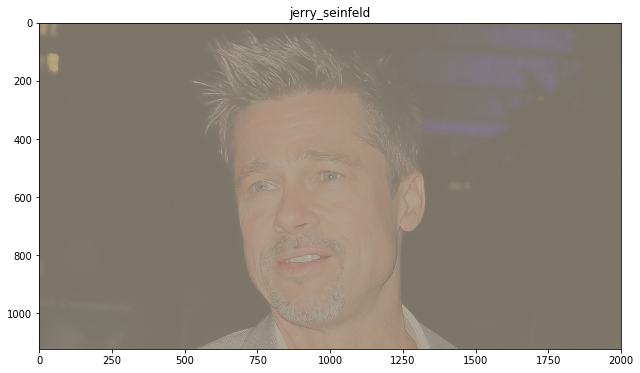

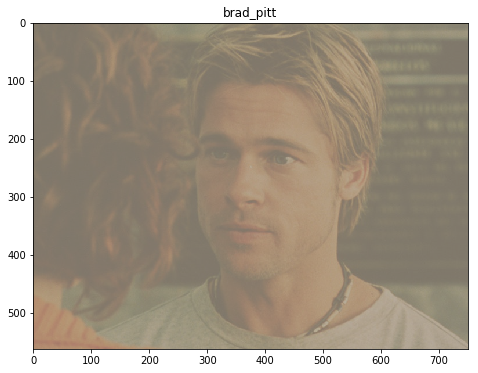

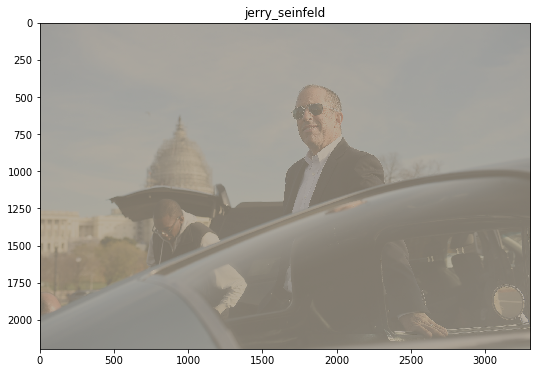

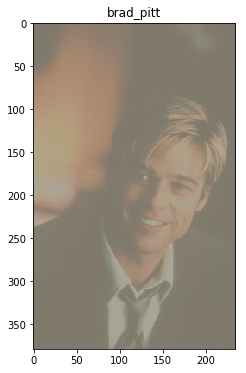

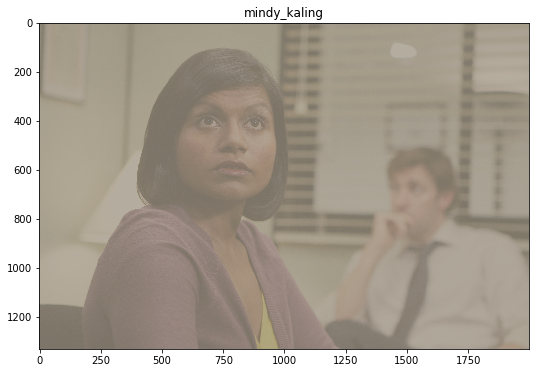

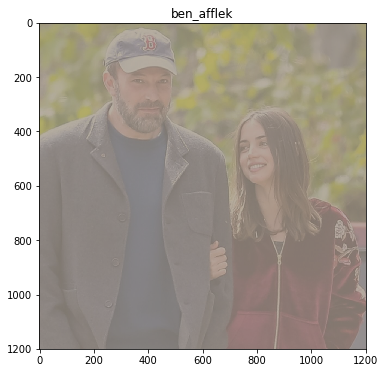

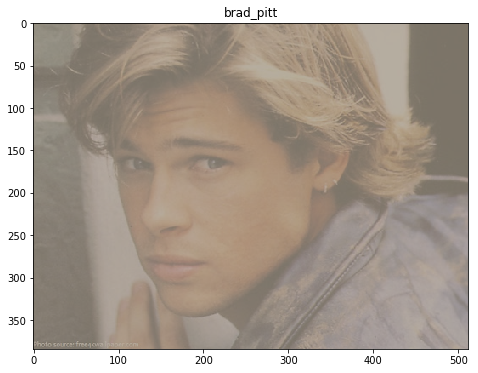

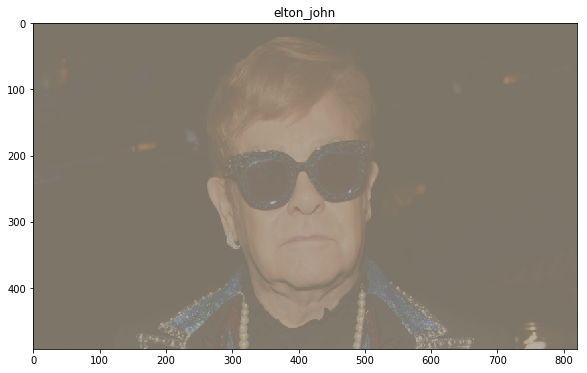

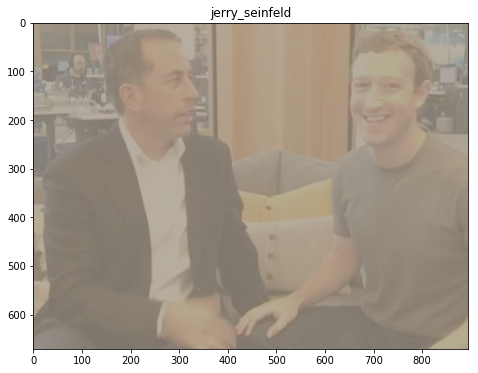

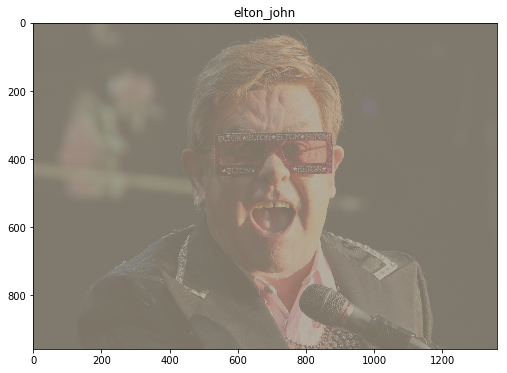

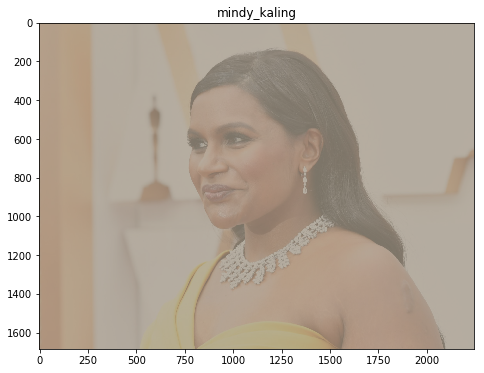

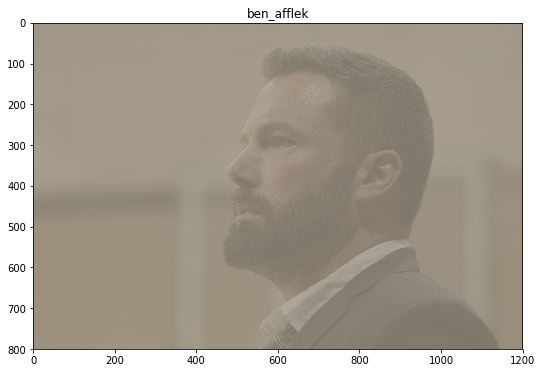

In [30]:
import glob
from PIL import Image
from torch.autograd import Variable
from os import listdir

with torch.no_grad():
    
    base_path = "./face_test/"
    correct = 0
    total = 0
    array = ['ben_afflek', 'brad_pitt' ,'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling']

    test_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean,
                             std=std)
    ])
    onlyfiles = [f for f in listdir(base_path)]
    print(onlyfiles)
    for files in onlyfiles:
        images=glob.glob(base_path + files)
        for image in images:
            img = Image.open(image)
            trans = transforms.ToPILImage()
            trans1 = transforms.ToTensor()
            transformed_image = test_transform(img).float()
            transformed_image = Variable(transformed_image, requires_grad=True)
            transformed_image = transformed_image.unsqueeze(0)
    #         plt.imshow(transformed_image)
    #         print(transformed_image)
            transformed_image = transformed_image.to(device)
            outputs = model(transformed_image)
            _, predicted = torch.max(outputs.data, 1)
            predicted_index_value = predicted.cpu().numpy()[0]
#             print("Predicted image is : " +array[predicted_index_value])
            imshow(trans1(img),array[predicted_index_value])


In [31]:
# save model
torch.save(model, './model_final')

In [ ]:
import boto3
file_name = './model_final'
s3 = boto3.resource('s3')
bucket='pytorch-models-face' # Replace with your s3 bucket name
s3.meta.client.upload_file(file_name, bucket, 'final_pytorch_model')

### Use the below code to load the model and use again to evaluate ###

In [ ]:
import torch
import torchvision
from torchvision import datasets,transforms 

import copy
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def imshow(inp, title):

    inp = inp.cpu().numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    
    plt.figure (figsize = (12, 6))

    plt.imshow(inp)
    plt.title(title)
    plt.pause(2)

model = torch.load('./saved_model')
model.eval()